# CNN Training

#### Library & CNN imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from scripts.dataset_prep import dataset_prep
from scripts.cnn_model import cnn

#### Image Dataset Acquisition

In [2]:
dataset_prep()

train_dir = "data/training"
val_dir = "data/validation"
test_dir = "data/test"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, 
    image_size=(128, 128),  
    batch_size=32,          
    label_mode='int',        
    color_mode="grayscale"  
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, 
    image_size=(128, 128), 
    batch_size=32, 
    label_mode='int',
    color_mode="grayscale"  
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, 
    image_size=(128, 128), 
    batch_size=32, 
    label_mode='int',
    color_mode="grayscale" 
)

class_names = train_dataset.class_names
print("Class names:", class_names)

Data folder already exists. Skipping folder creation.
Found 13804 files belonging to 8 classes.
Found 3944 files belonging to 8 classes.
Found 1972 files belonging to 8 classes.
Class names: ['APC', 'LBB', 'NOR', 'PAB', 'PVC', 'RBB', 'VEB', 'VFW']


### Model Training

In [3]:
model = cnn()

model.summary()

trained_cnn = model.fit(train_dataset, validation_data = val_dataset, epochs = 5)

c:\Users\ethol\College\FinalYearProject\arrythmia_detector_cnn\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,472 (2.05 MB)

 Trainable params: 538,472 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
432/432 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.1452 - loss: 4.1735 - val_accuracy: 0.1521 - val_loss: 1.9846
Epoch 2/5
432/432 ━━━━━━━━━━━━━━━━━━━━ 766s 2s/step - accuracy: 0.1453 - loss: 1.9841 - val_accuracy: 0.1521 - val_loss: 1.9835
Epoch 3/5
432/432 ━━━━━━━━━━━━━━━━━━━━ 273s 633ms/step - accuracy: 0.1421 - loss: 1.9835 - val_accuracy: 0.1521 - val_loss: 1.9835
Epoch 4/5
432/432 ━━━━━━━━━━━━━━━━━━━━ 275s 636ms/step - accuracy: 0.1461 - loss: 1.9838 - val_accuracy: 0.1521 - val_loss: 1.9835
Epoch 5/5
432/432 ━━━━━━━━━━━━━━━━━━━━ 277s 640ms/step - accuracy: 0.1388 - loss: 1.9843 - val_accuracy: 0.1521 - val_loss: 1.9836


### CNN Evaluation

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9235 - loss: 0.3085
Test Accuracy: 92.34%


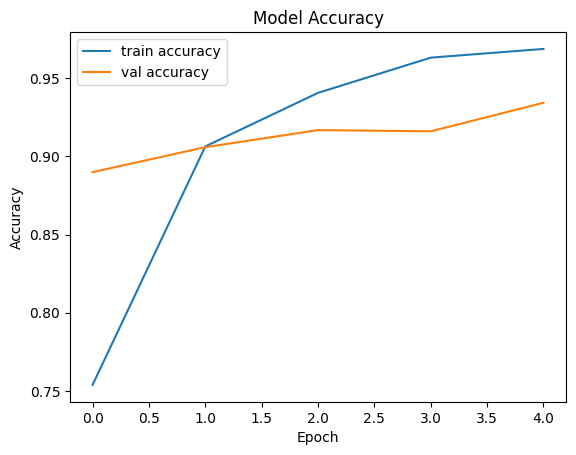

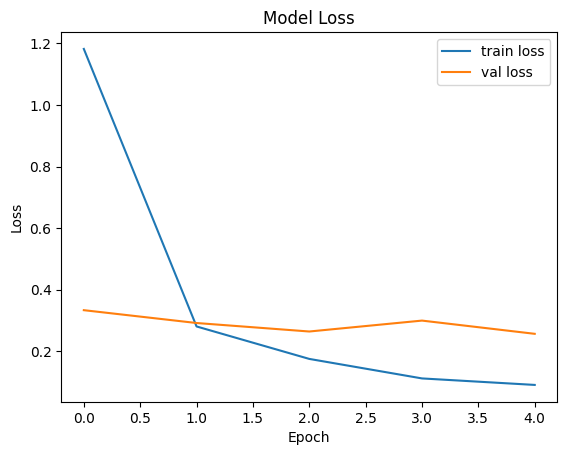

In [8]:
# evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualizing training & validation accuracy
plt.plot(trained_cnn.history['accuracy'], label='train accuracy')
plt.plot(trained_cnn.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualizing training & validation loss
plt.plot(trained_cnn.history['loss'], label='train loss')
plt.plot(trained_cnn.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()